In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
try:
    officer_df = pd.read_csv("chicago-police-data/data/unified_data/profiles/officer-profiles.csv")
    officer_df_cleaned = officer_df[["race", "gender", "appointed_date", "resignation_date", 
                                     "current_status", "resignation_date", "cleaned_rank"]]
    officer_df_cleaned.dropna(subset = ["race"], inplace = True)
    officer_df_cleaned.dropna(subset = ["cleaned_rank"], inplace = True)
except SettingWithCopyWarning:
    pass
officer_df_cleaned

/Users/aryamansinha/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/aryamansinha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/aryamansinha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,race,gender,appointed_date,resignation_date,current_status,resignation_date,cleaned_rank
4,BLACK,MALE,1966-06-20,1986-09-16,0.0,1986-09-16,POLICE OFFICER
5,WHITE,MALE,1971-10-25,2004-03-15,0.0,2004-03-15,POLICE OFFICER
6,HISPANIC,MALE,2009-12-16,NaN,1.0,NaN,POLICE OFFICER
7,BLACK,MALE,2016-06-27,NaN,1.0,NaN,POLICE OFFICER
8,BLACK,MALE,2005-12-05,NaN,1.0,NaN,POLICE OFFICER
...,...,...,...,...,...,...,...
32476,WHITE,MALE,2006-12-01,NaN,NaN,NaN,COMMANDER
32481,WHITE,MALE,2004-07-16,2017-08-06,NaN,2017-08-06,DEPUTY CHIEF
32489,WHITE,MALE,1995-12-18,2008-12-31,NaN,2008-12-31,COMMANDER
32509,WHITE,MALE,2005-03-01,2011-03-22,NaN,2011-03-22,COMMANDER


In [5]:
ranks = officer_df_cleaned["cleaned_rank"].unique()
races = officer_df_cleaned["race"].unique()
rank_race_dict = {}
for rank in ranks:
    rank_dict = {}
    for race in races:
        rank_dict[race] = 0
    rank_race_dict[rank] = rank_dict

for i in ranks:
    df = officer_df_cleaned.loc[officer_df_cleaned["cleaned_rank"] == i]
    for j in races:
        count = len(df.loc[df["race"] == j])
        rank_race_dict[i][j] = count
rank_race_dict

{'POLICE OFFICER': {'BLACK': 5808,
  'WHITE': 13231,
  'HISPANIC': 3403,
  'ASIAN/PACIFIC ISLANDER': 412,
  'NATIVE AMERICAN/ALASKAN NATIVE': 53},
 'SERGEANT': {'BLACK': 677,
  'WHITE': 2454,
  'HISPANIC': 324,
  'ASIAN/PACIFIC ISLANDER': 38,
  'NATIVE AMERICAN/ALASKAN NATIVE': 2},
 'FIELD TRAINING OFFICER': {'BLACK': 99,
  'WHITE': 166,
  'HISPANIC': 69,
  'ASIAN/PACIFIC ISLANDER': 7,
  'NATIVE AMERICAN/ALASKAN NATIVE': 0},
 'DETECTIVE': {'BLACK': 465,
  'WHITE': 2332,
  'HISPANIC': 235,
  'ASIAN/PACIFIC ISLANDER': 29,
  'NATIVE AMERICAN/ALASKAN NATIVE': 6},
 'OTHER': {'BLACK': 2,
  'WHITE': 21,
  'HISPANIC': 1,
  'ASIAN/PACIFIC ISLANDER': 0,
  'NATIVE AMERICAN/ALASKAN NATIVE': 0},
 'LIEUTENANT': {'BLACK': 115,
  'WHITE': 794,
  'HISPANIC': 46,
  'ASIAN/PACIFIC ISLANDER': 5,
  'NATIVE AMERICAN/ALASKAN NATIVE': 0},
 'COMMANDER': {'BLACK': 36,
  'WHITE': 82,
  'HISPANIC': 15,
  'ASIAN/PACIFIC ISLANDER': 3,
  'NATIVE AMERICAN/ALASKAN NATIVE': 0},
 'CAPTAIN': {'BLACK': 29,
  'WHITE': 285,

In [6]:
plot_dict

NameError: name 'plot_dict' is not defined

In [ ]:

barWidth = 0.25

plot_dict = {}
for rank in ranks:
    temp_list = []
    for race in rank_race_dict[rank].keys():
        temp_list.append(rank_race_dict[rank][race])
    plot_dict[rank] = temp_list

len(plot_dict)
        




In [22]:
black = 0
white = 1
hispanic = 2
asian_pacific = 3
native = 4

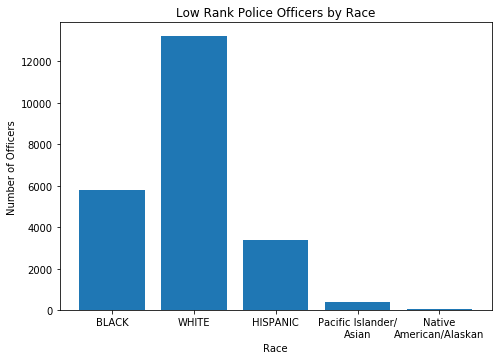

In [23]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
x_vals = list(races)
x_vals[asian_pacific] = "Pacific Islander/\nAsian"
x_vals[native] = "Native\nAmerican/Alaskan"
y_vals_pofficers = list(rank_race_dict["POLICE OFFICER"].values())
ax.bar(x_vals, y_vals_pofficers)
plt.title("Low Rank Police Officers by Race")
plt.xlabel("Race")
plt.ylabel("Number of Officers")
plt.show()

In [25]:
total_officers = []
total_officers.append(len(officer_df_cleaned.loc[officer_df_cleaned["race"] == "BLACK"]))
total_officers.append(len(officer_df_cleaned.loc[officer_df_cleaned["race"] == "WHITE"]))
total_officers.append(len(officer_df_cleaned.loc[officer_df_cleaned["race"] == "HISPANIC"]))
total_officers.append(len(officer_df_cleaned.loc[officer_df_cleaned["race"] == "ASIAN/PACIFIC ISLANDER"]))
total_officers.append(len(officer_df_cleaned.loc[officer_df_cleaned["race"] == 'NATIVE AMERICAN/ALASKAN NATIVE']))
total_officers



[7275, 19463, 4120, 495, 61]

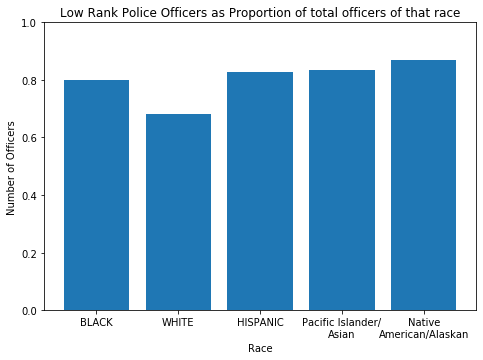

In [34]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
x_vals = list(races)
x_vals[asian_pacific] = "Pacific Islander/\nAsian"
x_vals[native] = "Native\nAmerican/Alaskan"
y_vals = []
for i in range(len(races)):
    y_vals.append(y_vals_pofficers[i]/total_officers[i])

ax.bar(x_vals, y_vals)
ax.set_ylim([0.0, 1.0])
plt.title("Low Rank Police Officers as Proportion of total officers of that race")
plt.xlabel("Race")
plt.ylabel("Number of Officers")
plt.show()

In [36]:
med_rank = [0, 0, 0, 0, 0]
for rank in ["SERGEANT", "FIELD TRAINING OFFICER", "DETECTIVE", "OTHER"]:
    temp_list = list(rank_race_dict[rank].values())
    for x in range(len(races)):
        med_rank[x] = med_rank[x] + temp_list[x]
med_rank

[1243, 4973, 629, 74, 8]

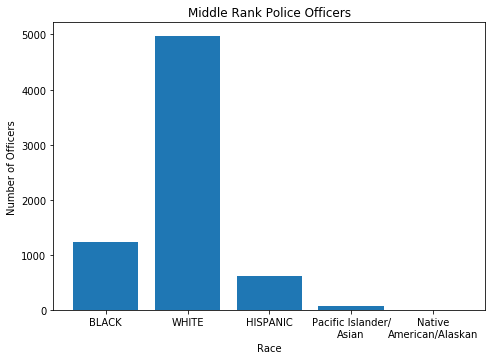

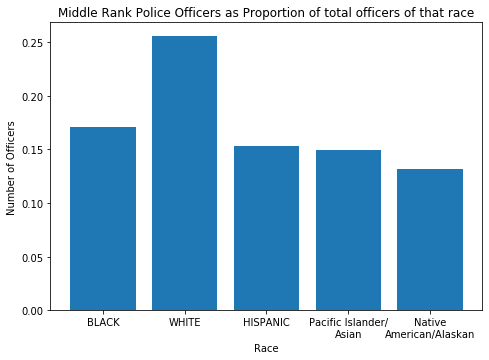

In [46]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
x_vals = list(races)
x_vals[asian_pacific] = "Pacific Islander/\nAsian"
x_vals[native] = "Native\nAmerican/Alaskan"
y_vals = med_rank
ax.bar(x_vals, y_vals)
# ax.set_ylim([0.0, 1.0])
plt.title("Middle Rank Police Officers")
plt.xlabel("Race")
plt.ylabel("Number of Officers")
plt.show()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
x_vals = list(races)
x_vals[asian_pacific] = "Pacific Islander/\nAsian"
x_vals[native] = "Native\nAmerican/Alaskan"
y_vals = []
for i in range(len(races)):
    y_vals.append(med_rank[i]/total_officers[i])

ax.bar(x_vals, y_vals)
plt.title("Middle Rank Police Officers as Proportion of total officers of that race")
plt.xlabel("Race")
plt.ylabel("Number of Officers")
plt.show()

In [43]:
high_rank = [0, 0, 0, 0, 0]
for rank in list(rank_race_dict.keys())[5:]:
    temp_list = list(rank_race_dict[rank].values())
    for x in range(len(races)):
        high_rank[x] = high_rank[x] + temp_list[x]
high_rank

[224, 1259, 88, 9, 0]

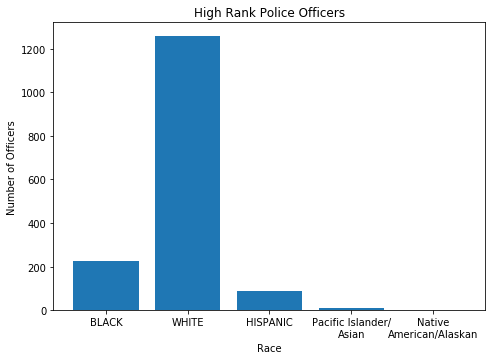

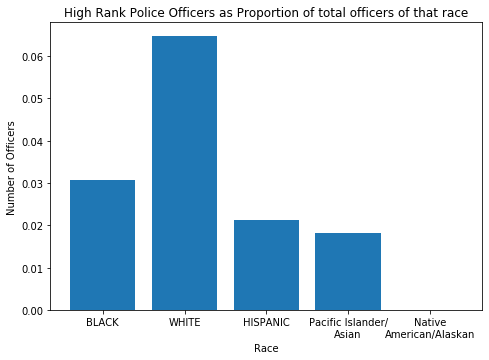

In [45]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
x_vals = list(races)
x_vals[asian_pacific] = "Pacific Islander/\nAsian"
x_vals[native] = "Native\nAmerican/Alaskan"
y_vals = high_rank
ax.bar(x_vals, y_vals)
# ax.set_ylim([0.0, 1.0])
plt.title("High Rank Police Officers")
plt.xlabel("Race")
plt.ylabel("Number of Officers")
plt.show()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
x_vals = list(races)
x_vals[asian_pacific] = "Pacific Islander/\nAsian"
x_vals[native] = "Native\nAmerican/Alaskan"
y_vals = []
for i in range(len(races)):
    y_vals.append(high_rank[i]/total_officers[i])

ax.bar(x_vals, y_vals)
plt.title("High Rank Police Officers as Proportion of total officers of that race")
plt.xlabel("Race")
plt.ylabel("Number of Officers")
plt.show()


In [33]:
len(races)

5

In [10]:
ranks

array(['POLICE OFFICER', 'SERGEANT', 'FIELD TRAINING OFFICER',
       'DETECTIVE', 'OTHER', 'LIEUTENANT', 'COMMANDER', 'CAPTAIN',
       'FIRST DEPUTY SUPERINTENDENT', 'DEPUTY CHIEF',
       'ASSISTANT DEPUTY SUPERINTENDENT', 'DEPUTY SUPERINTENDENT',
       'CHIEF', "SUPERINTENDENT'S CHIEF OF STAFF",
       'SUPERINTENDENT OF POLICE', 'ASSISTANT SUPERINTENDENT',
       'DIRECTOR OF CAPS'], dtype=object)

In [28]:
x_vals

['BLACK',
 'WHITE',
 'HISPANIC',
 'Pacific Islander/\nAsian',
 'Native\nAmerican/Alaskan']

In [29]:
y_vals

[0.7983505154639176,
 0.6798027025638391,
 0.8259708737864078,
 0.8323232323232324]

In [ ]:
#seargent, field training, detective, other